### Etudiant 1: GIANG Phuong-Thu, Cécile (3530406)
### Etudiant 2: LENOIR Romain (3670199)

# TME 1: Arbres de décisions, sélection de modèles

In [1]:
# Importation du fichier python associé au TME
from tme1 import *

## Exercice 1: Entropie

**Tests sur les fonctions `entropie` et `entropie_cond`**

L'**entropie** mesure la _quantité d'information_ provenant d'une source. Elle est d'autant plus grande que la source émet d'informations différentes, et est minimale (nulle) si elle n'émet qu'un seul type d'informations.

Dans notre cas nous appliquons cette fonction d'entropie à une liste de labels, correspondant aux classes respectives des échantillons $x = (x_1, x_2, ..., x_n)$ d'une base de données $X$. Dans un arbre de décision et pour un certain noeud, l'attribut $x_i$ de $x$ et le seuil $s$ tels que le test $x < s$ sépare les exemples du noeud courant en deux noeuds fils d'entropies respectives minimales seront l'attribut et le seuil optimaux, ceux que nous devront choisir pour départager les exemples du noeud courant.

L'**entropie conditionnelle**, elle, permet de mesurer l'homogénétité d'une n-partition d'une liste de labels. Il s'agit donc là aussi de trouver la partition d'entropie minimale (homogénéité maximale, car alors un label sera prédominant dans chaque sous-partition).

Considérons deux classes $0$ et $1$.
Instinctivement, nous pouvons imaginer que l'entropie d'une liste de labels ne contenant que des $0$ ou que des $1$ sera minimale (donc égale à 0) puisqu'il n'y a aucun désordre. Inversement, une liste de labels contenant autant de $0$ que de $1$ sera d'entropie maximale (désordre maximal).

In [2]:
print('Entropie minimale pour [0,0,0,0,0,0,0,0,0,0]: ', entropie([0,0,0,0,0,0,0,0,0,0]))
print('Entropie maximale pour [0,1,1,1,0,0,0,0,1,1]: ', entropie([0,1,1,1,0,0,0,0,1,1]))
print('Entropie pour [0,0,0,1,1,0,0,0,1,0,0,0,0]: ', entropie([0,0,0,1,1,0,0,0,1,0,0,0,0]))

Entropie minimale pour [0,0,0,0,0,0,0,0,0,0]:  0.0
Entropie maximale pour [0,1,1,1,0,0,0,0,1,1]:  1.0
Entropie pour [0,0,0,1,1,0,0,0,1,0,0,0,0]:  0.7793498372920852


Les observations seront les mêmes pour l'entropie conditionnelle. Notons $P$ une partition de labels (donc une liste de listes de labels). Une partition telle que chaque sous-partition ne contient qu'un type de labels sera d'entropie minimale. A l'inverse, une partition telle que chaque sous-partition contient une même proportion de plusieurs labels sera d'entropie maximale.

Dans les exemples ci-dessous, nous nous limiterons à une 2-partition des labels.

In [3]:
print('Entropie minimale pour [[0,0,0,0,0,0,0],[1,1,1]]: ', entropie_cond([[0,0,0,0,0,0,0],[1,1,1]]))
print('Entropie maximale pour [[0,0,0,1,1,1],[1,1,0,0]]: ', entropie_cond([[0,0,0,1,1,1],[1,1,0,0]]))
print('Entropie pour [[0,1,0,0,0],[1,0,1,1,1]]: ', entropie_cond([[0,1,0,0,0],[1,0,1,1,1]]))

Entropie minimale pour [[0,0,0,0,0,0,0],[1,1,1]]:  0.0
Entropie maximale pour [[0,0,0,1,1,1],[1,1,0,0]]:  1.0
Entropie pour [[0,1,0,0,0],[1,0,1,1,1]]:  0.7219280948873623


**Chargement d'un extrait de la base `imdb` et premiers traitements**

Après chargement du fichier `imdb_extrait.pkl`, chaque ligne de la variable `data` contient:
* la description d'un film (32 attributs) aussi contenu dans `datax`
* le titre d'un film (1 attribut) aussi contenu dans `id2titles`
* la signification d'un attribut de `datax` aussi contenu dans `fields`

En particulier, les 28 premiers attributs de `datax` (indices 0 à 27) sont des attributs binaires associés au genre du film. Les 6 derniers sont quant à eux la durée, la couleur, l'année, le budget, le nombre de votes et la note.

Le vecteur `datay` contient le score associé à chaque film ($1$ si la note attribuée est supérieure à 6.5, $-1$ sinon).

In [4]:
# Entropie du vote (Y = -1 ou Y = 1)
entropie = entropie(datay)

# Entropie conditionnelle du vote selon la partition induite par chaque attribut binaire (attributs d'indice 0 à 27)

entropies_cond = np.zeros(28)

for i in range(28):
    # Indices pour lesquels l'attribut i vaut 0 ou 1
    index_p1 = np.where(np.array([d[i] for d in datax]) == 0)
    index_p2 = np.where(np.array([d[i] for d in datax]) == 1)
    
    # Partition des labels selon les valeurs de l'attribut i
    p1 = [datay[j] for j in index_p1][0]
    p2 = [datay[j] for j in index_p2][0]
    
    # Mise à jour de la valeur de l'entropie conditionnelle du vote selon la partition induite par l'attribut i
    entropies_cond[i] = entropie_cond([p1,p2])

## Affichages de l'entropie de Y (votes) et des entropies conditionnelles
print('\nEntropie de Y (vote):\n', entropie)
print('\nEntropie conditionnelles:\n', entropies_cond)


Entropie de Y (vote):
 0.9869089469021289

Entropie conditionnelles:
 [0.98094647 0.98623973 0.98690613 0.98467258 0.98689223 0.97090779
 0.97780903 0.96421532 0.98333215 0.98690895 0.98690895 0.98690895
 0.97545709 0.98487557 0.98678246 0.98637377 0.98690895 0.92624691
 0.9704709  0.98565317 0.98444894 0.97327102 0.98502739 0.98663702
 0.98462641 0.98690895 0.98690733 0.96582419]


La différence entre l'entropie de Y et de l'entropie de Y conditionnellement à un attribut i est le **gain d'information** obtenu si l'on choisit l'attribut i pour séparer les exemples du noeud actuel. Il est donc à maximiser.

In [5]:
gain = (entropie-entropies_cond).tolist()
print('\nGain d\'information: \n', gain)

index_best = gain.index(max(gain))
print('\nMeilleur attribut : ', fields[index_best], 'en position ', index_best)


Gain d'information: 
 [0.005962475966459713, 0.000669213183839168, 2.8206657303186944e-06, 0.0022363643254944554, 1.671569215644375e-05, 0.01600116072381408, 0.009099918441167643, 0.022693626596595462, 0.00357679967243818, 0.0, 0.0, 0.0, 0.011451858550804328, 0.0020333772580968246, 0.0001264822267186272, 0.000535179901427596, 0.0, 0.0606620350502628, 0.016438042107613682, 0.0012557809666178255, 0.0024600076270769877, 0.013637926156969682, 0.0018815533898769443, 0.00027192348169247094, 0.002282541280716699, 0.0, 1.6124157214969514e-06, 0.02108475467768811]

Meilleur attribut :  Drama en position  17


## Quelques expériences préliminaires

Nous utilisons maintenant la librairie de `scikit-learn` afin d'implémenter notre arbre de décisions. Le code de création de l'arbre (fourni) est déjà intégré dans notre code python, et l'arbre a déjà appris sur les données de `datax` et `datay`.

Affichons le vecteur de prédiction retourné par notre arbre sur les 5 premiers échantillons de `datax`:

In [6]:
## Comparaison entre classes prédites par l'arbre de décision sur les 5 premiers échantillons et les classes réelles
print('Classes prédites par l\'arbre : ', dt.predict(datax[:5, :]))
print('Classes réelles : ', datay[:5])

Classes prédites par l'arbre :  [-1  1  1 -1 -1]
Classes réelles :  [-1  1  1  1 -1]


La fonction `score` à laquelle l'on passe les paramètres `datax` et `datay` renvoie le taux de bonnes classifications des données de `datax` avec l'arbre de décisions sachant les vrais labels `datay`.

In [7]:
## Affichage du score (taux de bonne classification)
print('Score fourni par la fonction sklearn.tree.score : ', dt.score(datax, datay))
print('Nous pouvons retrouver ce résultat à la main : ', len(np.where(dt.predict(datax) == datay)[0])/len(datay))

Score fourni par la fonction sklearn.tree.score :  0.736647045999564
Nous pouvons retrouver ce résultat à la main :  0.736647045999564


### Différents tests pour des profondeurs d'arbre différentes

**Pour une profondeur `max_depth = 2`:**

Taux de bonne classification pour une profondeur de  2 :  0.6825812077610639


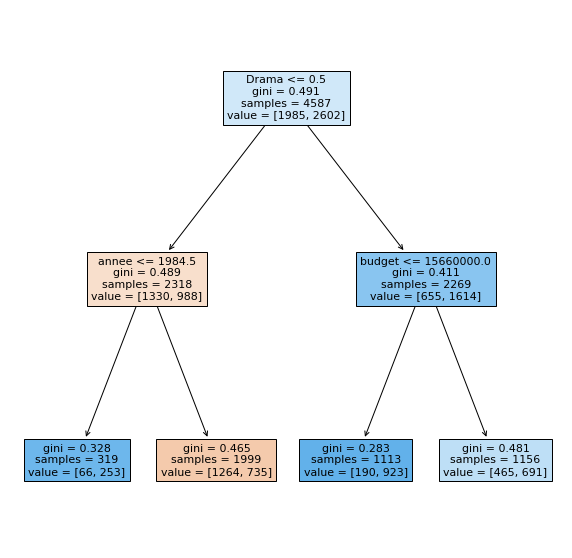

In [8]:
instanceDT(max_depth=2)

**Pour une profondeur `max_depth = 5`:**

Taux de bonne classification pour une profondeur de  5 :  0.736647045999564


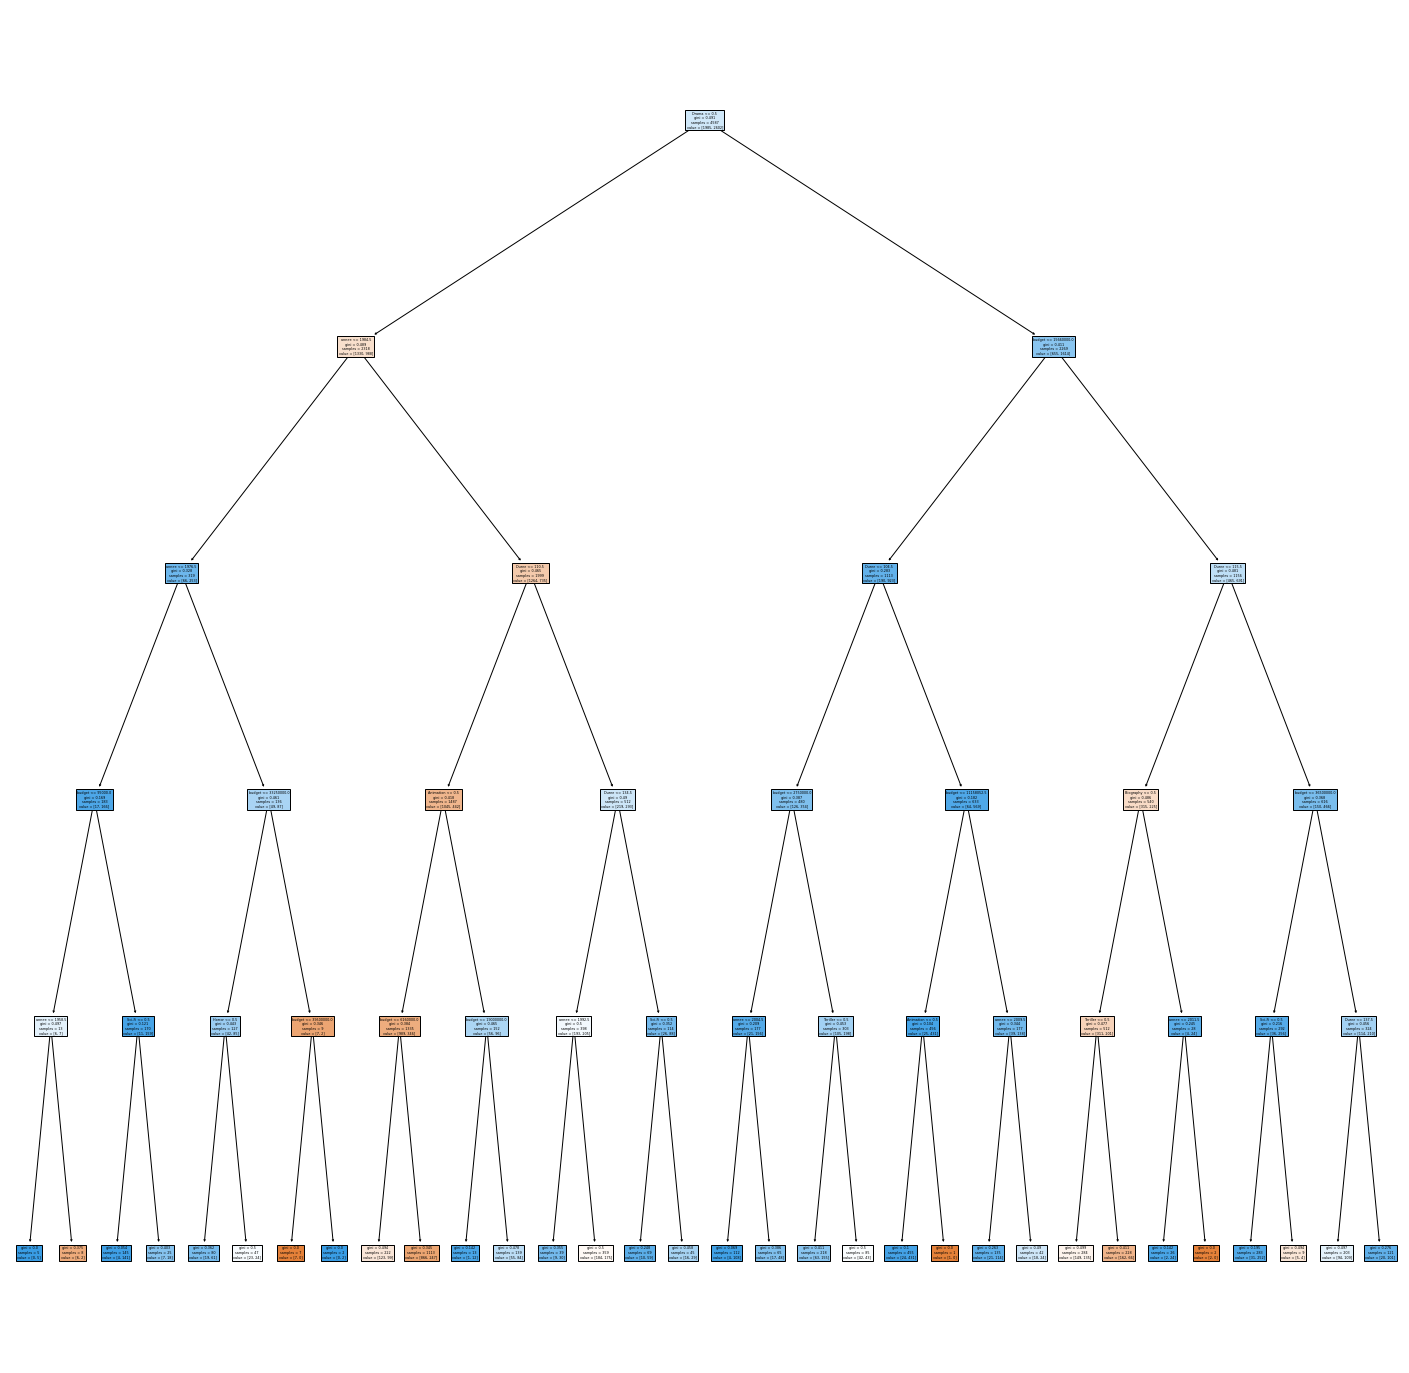

In [11]:
instanceDT(max_depth=5)

**Pour une profondeur `max_depth = 8`:**

Taux de bonne classification pour une profondeur de  8 :  0.7996511881403968


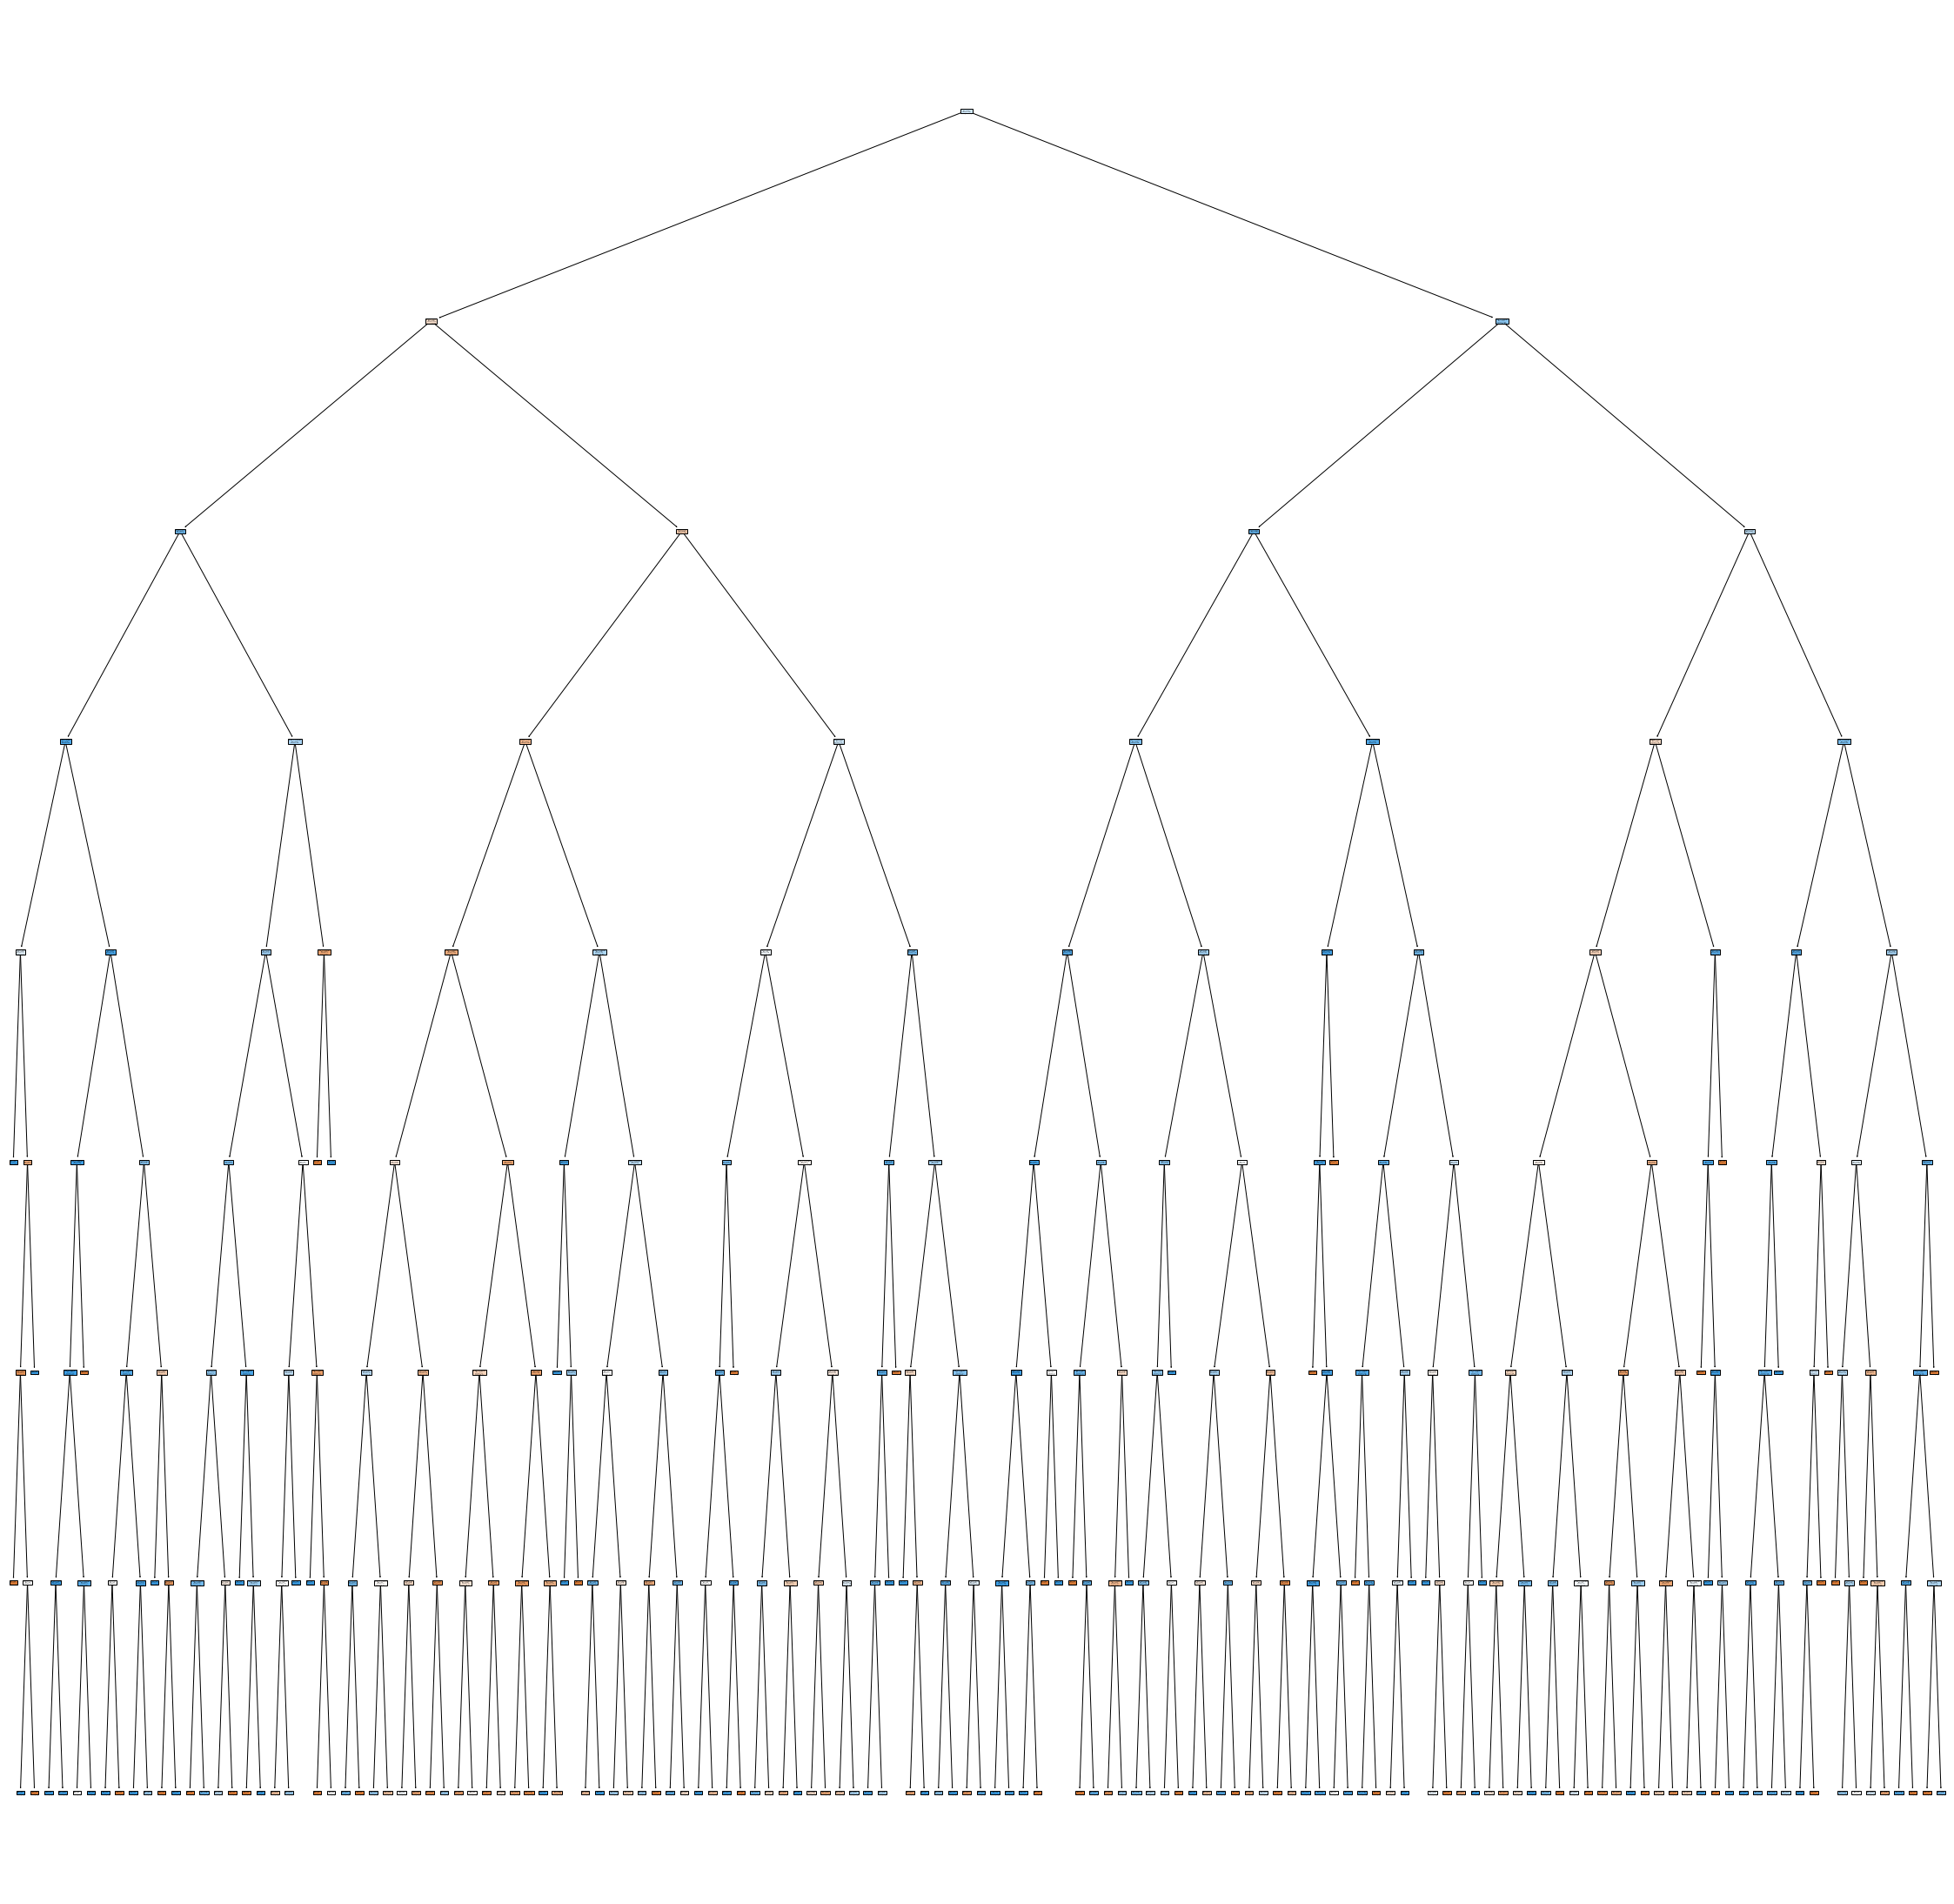

In [13]:
instanceDT(max_depth=8)

**Observations:**

Le taux de bonne classification de l'arbre augment avec sa profondeur, ce qui est normal: on se permet de diviser les noeuds de niveau inférieur à `max_depth`, sous réserve que leur nombre d'exemples est supérieur à `min_samples_split` (2 ici). Le problème, c'est que bien souvent pour une profondeur trop grande, la condition d'arrêt sur `min_samples_split` est atteinte avant la condition de profondeur: on se retrouve alors avec beaucoup de feuilles qui correspondent à 2 exemples bien précis, on est en situation de sur-apprentissage.

Plus la valeur de la profondeur augmente, plus il y a de feuille et donc plus on est en sur-apprentissage.

De plus, notons que le score de classification est calculé sur les données d'apprentissage (`datax` et `datay`), et est donc complètement biaisé. Pour des données autres que celles de `datax`, le taux de bonne classification serait moins bon.

## Sur et sous apprentissage

Afin d'éviter de se retrouver avec le problème de sous-apprentissage rencontré précédemment, nous partitionnons maintenant nos données en deux ensembles d'exemples étiquetés:
* l'ensemble d'apprentissage servant à construire notre classifieur
* l'ensemble de test servant à évaluer l'erreur du classifieur

Nous partionnerons nos ensembles de données d'apprentissage et de test suivant les partages $(0.2, 0.8)$, $(0.5, 0.5)$ et $(0.8, 0.2)$.

**NOTE: Dans la suite, les courbes d'erreurs de classification sur les données `train` seront en bleu, les courbes d'erreurs de classification sur les données `test` sont en orange.**

**Calcul des erreurs pour une partition `train`-`test` de $[0.2, 0.8]$:**

No handles with labels found to put in legend.


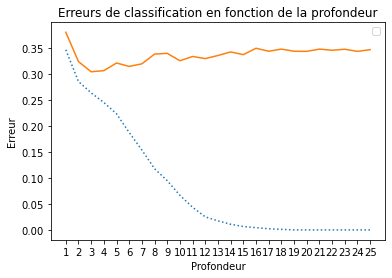

Erreur sur les données d'entraînement en bleu, sur les données de test en orange


In [8]:
partitionDT(ratio=[0.2,0.8])
print('Erreur sur les données d\'entraînement en bleu, sur les données de test en orange')

Dans le cas où il y a trop peu de données, le taux de mauvaise classification en test commence par decroître en fontion de la profondeur puis croître après avoir atteint l'erreur minimale (environ 0.3 pour une profondeur de 3 ou 4), puis remonte rapidement pour stagner à 0.35 à partir d'une profondeur supérieure à 9.
Le problème est que pour que l'erreur soit minimale, la profondeur de l'arbre doit être de 3 ou 4: l'arbre n'est pas bien profond et le nombre d'exemples dans chaque feuille reste trop important: on est dans un cas de **sous-apprentissage**.

L'erreur sur les données de test, comme nous pouvions le deviner, décroit avec la profondeur de l'arbre jusqu'à atteindre.

**Calcul des erreurs pour une partition `train`-`test` de $[0.5, 0.5]$:**

No handles with labels found to put in legend.


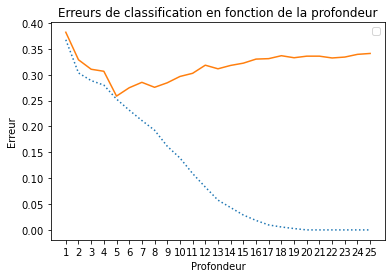

Erreur sur les données d'entraînement en bleu, sur les données de test en orange


In [9]:
partitionDT(ratio=[0.5,0.5])
print('Erreur sur les données d\'entraînement en bleu, sur les données de test en orange')

**Calcul des erreurs pour une partition `train`-`test` de $[0.8, 0.2]$:**

No handles with labels found to put in legend.


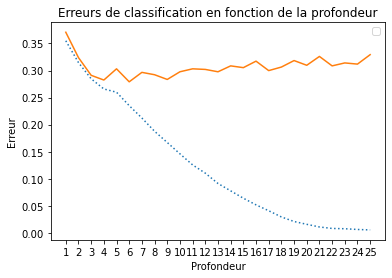

Erreur sur les données d'entraînement en bleu, sur les données de test en orange


In [10]:
partitionDT(ratio=[0.8,0.2])
print('Erreur sur les données d\'entraînement en bleu, sur les données de test en orange')

Nous sommes cette fois-ci dans le cas ou nous avons beaucoup de données en apprentissage, et beaucoup moins en entraînement. Le taux de mauvaise classification en test commence par decroître en fontion de la profondeur puis croître après avoir atteint l'erreur minimale (environ 0.26 pour une profondeur comprise entre 4 et 10), puis remonte pour stagner à 0.33 à partir d'une profondeur supérieure à 15.

Nous n'avons plus le problème que nous rencontrions avec un ration de $[0.2, 0.8]$: un arbre de profondeur comprise entre 4 et 10 a beaucoup moins d'échantillons de chaque feuille que pour un arbre de profondeur 3 (cas ratio $[0.2, 0.8]$).

L'erreur sur les données de test, comme nous pouvions le deviner, décroit avec la profondeur de l'arbre jusqu'à atteindre.

## Validation croisée: sélection de modèles

Pour sélectionner un modèle tout en considérant le plus
grand nombre d’exemples possible pour l’apprentissage, on utilise généralement une procédure dite
de sélection par validation croisée (fonction `validationCroisee(n)`). Cette procédure est implémentée dans le fichier `tme1.py`, et calcule les erreurs moyennes de classification pour une n-partition, selon la profondeur de l'arbre de décisions.

Nous en donnons ci-dessous quelques exécutions.

**Validation croisée sur 5 sous-ensembles de `data`:**

No handles with labels found to put in legend.


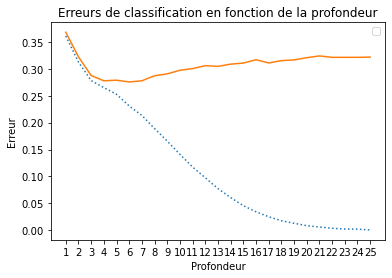

Erreur de classification minimale en entraînement:  0.0005449591280653809 atteinte pour une profondeur  24
Erreur de classification minimale en évaluation:  0.27555945194023324 atteinte pour une profondeur  5


In [2]:
validationCroisee(5, display=True)

**Validation croisée sur 20 sous-ensembles de `data`:**

No handles with labels found to put in legend.


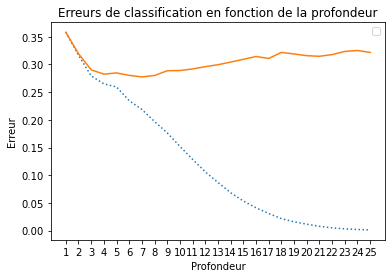

Erreur de classification minimale en entraînement:  0.0012621600410284372 atteinte pour une profondeur  24
Erreur de classification minimale en évaluation:  0.27753559901272074 atteinte pour une profondeur  6


In [4]:
validationCroisee(20, display=True)

**Validation croisée sur 50 sous-ensembles de `data`:**

No handles with labels found to put in legend.


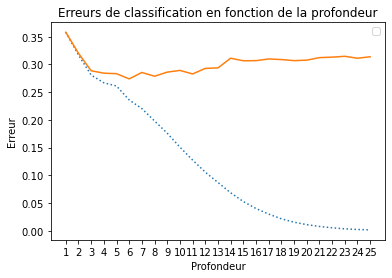

Erreur de classification minimale en entraînement:  0.0014815552274373743 atteinte pour une profondeur  24
Erreur de classification minimale en évaluation:  0.27402054467271864 atteinte pour une profondeur  5


In [6]:
validationCroisee(50, display=True)

**Validation croisée sur 100 sous-ensembles de `data`:**

No handles with labels found to put in legend.


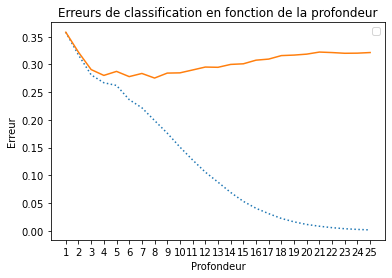

Erreur de classification minimale en entraînement:  0.0013740991490903698 atteinte pour une profondeur  24
Erreur de classification minimale en évaluation:  0.2755217391304346 atteinte pour une profondeur  7


In [5]:
validationCroisee(100, display=True)

**Observations:**

Nous remarquons que le nombre de sous-ensembles que l'on prend pour partitionner `data` n'a que très peu d'importance sur l'erreur de classification minimale: elle est de 0.275 pour une partition de `data` en 5 sous-ensembles, contre 0.277 pour une partition en 20 sous-ensembles. Nous ne pouvons pas non plus dire que plus la partition est grande, plus l'erreur est petite.